In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import re
sns.set()

In [2]:
data = pd.read_excel('week2_challenge_data_source.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [3]:
dat = data.copy()

In [4]:
da = data.copy()

In [5]:
telcomdata = data.copy()

In [7]:
da['frequency'] = da['MSISDN/Number'].map(da['MSISDN/Number'].value_counts())
dff = da.sort_values(by='frequency', ascending=False, na_position='last')

#Top 10 customers base on total data
dff.head(10)[['MSISDN/Number','frequency']]

,MSISDN/Number,frequency
50161,3.362632e+10,18.0
56316,3.362632e+10,18.0
50321,3.362632e+10,18.0
50013,3.362632e+10,18.0
50014,3.362632e+10,18.0
51642,3.362632e+10,18.0
50023,3.362632e+10,18.0
50029,3.362632e+10,18.0
50032,3.362632e+10,18.0
53134,3.362632e+10,18.0


In [ ]:
#Sort by session duration and get the top 10 customers
df = da.sort_values(by='Dur. (ms)', ascending=False, na_position='last')
#Top 10 customers
df.head(10)[['MSISDN/Number','Dur. (ms)']]

In [ ]:
#Creating a column for session total traffic
da['total'] = da['Total DL (Bytes)'] + da['Total UL (Bytes)']
#Sort by total traffic
df1 = da.sort_values(by='total', ascending=False, na_position='last')
#Top 10 customers base on total data
df1.head(10)[['MSISDN/Number','total']]

## Preparing data for cluster analysis

In [ ]:
#Filter out the metrics for normalization
newdat = da.filter(['Dur. (ms)','total','frequency'], axis=1)
newdat.fillna(method='ffill')
#convert bytes to megabytes
newdat['total'] = newdat['total']*10**-6

#convert milliseconds to seconds
newdat['Dur. (ms)'] = newdat['Dur. (ms)']*10**-3

#preprocessing.normalize(newdat, norm='l2')

In [322]:
#newdat.rename(columns={'Dur. (ms)':'Duration_in_sec'}, inplace=True)

In [323]:
newdat.head()

,Dur. (ms),total,frequency
0,1823.652,345.629377,2.0
1,1365.104,707.185356,2.0
2,1361.762,307.690973,1.0
3,1321.509,889.352748,1.0
4,1089.009,607.681403,1.0


In [324]:
mdat = newdat.copy()

In [325]:
#Replace white spaces with np.NaN for 
for i in newdat.columns:
    da[i][da[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None 
# replace na using forward fill method for session id column
newdat.fillna(method ='ffill', inplace = True)

C:\Users\Programms\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [326]:
newdat = preprocessing.normalize(newdat, norm='l2')

In [327]:
#Normalization output
newdat

array([[9.82509189e-01, 1.86210987e-01, 1.07751829e-03],
       [8.87925520e-01, 4.59985411e-01, 1.30089066e-03],
       [9.75410529e-01, 2.20394617e-01, 7.16285613e-04],
       ...,
       [1.54639553e-01, 9.87969702e-01, 1.57395549e-03],
       [2.36904789e-01, 9.71529859e-01, 2.41961790e-03],
       [2.36904789e-01, 9.71529859e-01, 2.41961790e-03]])

In [328]:
#convert normalized data back to data frame
dataset = pd.DataFrame({'Duration_in_sec': newdat[:, 0], 'total': newdat[:,1], 'frequency':newdat[:,2]}) 

In [329]:
dataset.head()

,Duration_in_sec,total,frequency
0,0.982509,0.186211,0.001078
1,0.887926,0.459985,0.001301
2,0.975411,0.220395,0.000716
3,0.829624,0.558322,0.000628
4,0.873244,0.487282,0.000802


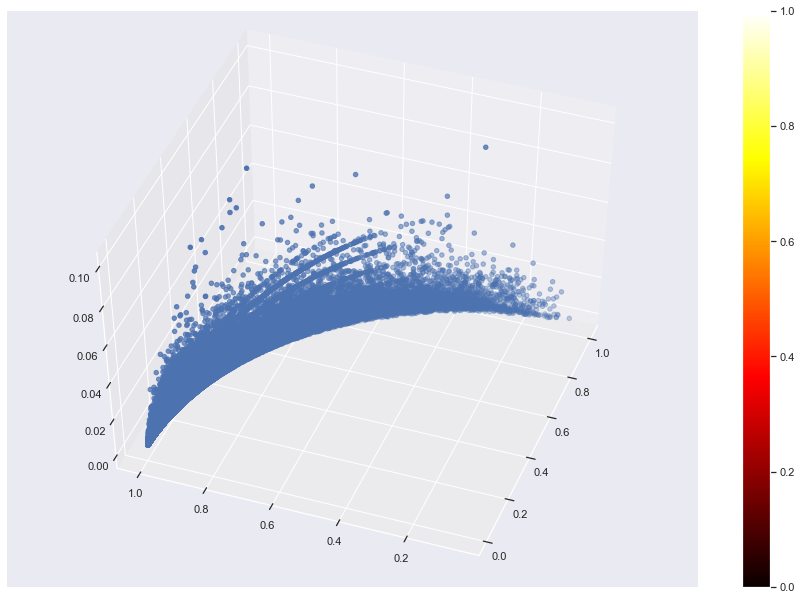

In [330]:
#K-mean clustering and visualization
kmeans = KMeans(3)
identified_cluster = kmeans.fit_predict(newdat)
identified_cluster

data_wt_clusters = dataset.copy()
data_wt_clusters['clusters'] = identified_cluster
fig =plt.figure()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111,projection='3d')
ax = Axes3D(fig, rect=[1, 2, 2, 2], elev=48, azim=200)

x = data_wt_clusters['Duration_in_sec']
y = data_wt_clusters['total']
z = data_wt_clusters['frequency']

img = ax.scatter(x,y,z, cmap=plt.hot())
fig.colorbar(img)
plt.show()


In [280]:
#cluster labels
identified_cluster

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
# Computing various statics of the non-normalized clusters


In [331]:
mdat.head()

,Dur. (ms),total,frequency
0,1823.652,345.629377,2.0
1,1365.104,707.185356,2.0
2,1361.762,307.690973,1.0
3,1321.509,889.352748,1.0
4,1089.009,607.681403,1.0


In [332]:
# Mean, max, min
mdat.describe()

,Dur. (ms),total,frequency
count,150000.000000,150000.000000,148935.000000
mean,104.608560,495.764636,1.859905
std,81.037621,244.381802,1.300876
min,7.142000,28.956107,1.000000
25%,57.440500,284.475924,1.000000
50%,86.399000,496.861102,1.000000
75%,132.430250,706.505882,2.000000
max,1859.336000,955.984776,18.000000


In [334]:
#Total for each cluster
mdat.sum(axis = 0)

Dur. (ms)    1.569128e+07
total        7.436470e+07
frequency    2.770050e+05
dtype: float64

The result shows that the avarage time people spend per session is 105ms, a minimum duration last for about 7ms and maximum of 1859ms. See table above for that of total data spent and the session frequency.

In [390]:
dmin = [7.142000, 28.956107, 1.000000]
dmax = [1859.336000, 955.984776, 18.000000] 
avg = [104.608560, 495.764636, 1.859905]
tot = [1.569128e+07,7.436470e+07, 2.770050e+05]
datac = {'minimums':dmin, 'maximums': dmax,  'total': tot,'avg':avg}
mdf = pd.DataFrame(datac)

In [393]:
mdf.insert(0, 'Metrics', ['Duration','Total data','Frequency'])


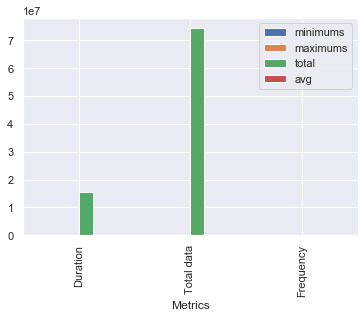

In [398]:
mdf.plot.bar()

In [ ]:
# #Replace white spaces with np.NaN for 
# for i in da.columns:
#     if da[i].dtype == np.dtype('object'):
#         da[i][da[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]=None 
# # replace na using forward fill method for session id column
# da["Bearer Id"].fillna(method ='ffill', inplace = True)

## Agregation of data usage statistics per application

In [460]:
#Find the total data for each application and create new columns for the totals
telcomdata['Netflix'] = telcomdata['Netflix DL (Bytes)'] + telcomdata['Netflix UL (Bytes)']
telcomdata['YouTube'] = telcomdata['Youtube DL (Bytes)'] + telcomdata['Youtube UL (Bytes)']
telcomdata['Gaming'] = telcomdata['Gaming DL (Bytes)'] + telcomdata['Gaming UL (Bytes)']
telcomdata['Other'] = telcomdata['Other DL (Bytes)'] + telcomdata['Other UL (Bytes)']
telcomdata['Social Media'] = telcomdata['Social Media DL (Bytes)'] + telcomdata['Social Media UL (Bytes)']
telcomdata['Google'] = telcomdata['Google DL (Bytes)'] + telcomdata['Google UL (Bytes)']
telcomdata['Email'] = telcomdata['Email DL (Bytes)'] + telcomdata['Email DL (Bytes)']

In [498]:
#telcomdata.info()

In [542]:
dtcol = telcomdata.iloc[:, 55:]
dtcol.insert(0, 'MSISDN/Number',telcomdata['MSISDN/Number'])

In [543]:
dtcol

,MSISDN/Number,Netflix,YouTube,Gaming,Other,Social Media,Google,Email
0,3.366496e+10,1.785519e+07,1.835594e+07,2.924265e+08,1.805588e+08,1.570185e+06,2.905912e+06,7.127084e+06
1,3.368185e+10,3.556554e+07,3.935912e+07,6.099208e+08,5.419594e+08,1.933278e+06,4.414096e+06,1.258092e+06
2,3.376063e+10,2.375120e+07,3.442524e+07,2.299803e+08,4.149084e+08,1.726277e+06,1.022912e+07,5.380302e+06
3,3.375034e+10,1.509259e+07,3.653476e+07,8.103879e+08,7.618372e+08,6.574930e+05,1.181176e+07,2.879508e+06
4,3.369980e+10,1.753980e+07,3.422225e+07,5.312370e+08,5.646198e+08,9.127880e+05,7.748843e+06,3.872992e+06
...,...,...,...,...,...,...,...,...
149996,3.365069e+10,3.756186e+07,2.795510e+07,5.358069e+08,1.675193e+07,3.517065e+06,1.278491e+07,1.152780e+05
149997,3.366345e+10,4.064329e+07,2.216552e+07,6.316281e+08,7.146381e+08,2.352181e+06,4.415361e+06,3.908828e+06
149998,3.362189e+10,1.502970e+07,2.451641e+07,5.669338e+08,1.324156e+08,1.260239e+06,6.585469e+06,3.051468e+06
149999,3.361962e+10,1.649484e+07,1.712251e+07,3.550664e+08,8.161200e+08,8.231090e+05,7.757267e+06,4.456540e+06


In [ ]:
# Make copy of the data to work with each application
netflixdf = dtcol.copy()
youtubedf = dtcol.copy()
gamingdf = dtcol.copy()
socialdf = dtcol.copy()
googledf = dtcol.copy()
emaildf = dtcol.copy()

In [ ]:
# function to get the top 10 an application
def getStats(df, col):
    dt = df.groupby('MSISDN/Number')[col].sum()
    res = [(key, value) for (key, value) in sorted(dt.items(), key=lambda x: x[1])]
    result = (res[-10:])
    result = result[::-1]
    return result

In [ ]:
netflix = getStats(netflixdf, 'Netflix')
youtube = getStats(youtubedf, 'YouTube')
game =   getStats(gamingdf, 'Gaming')
soc =    getStats(socialdf, 'Social Media')
googl =  getStats(googledf, 'Google')
email =  getStats(emaildf, 'Email')

In [ ]:
game
valu = []
dlabels = ['208201906760163.0', '208201715944176.0','208201007176097.0','208202100881019.0','208201402778052.0','208200313716101.0','208200853859127.0','208201009693091.0','208201716367238.0','208202101287048.0']
for i in game:
    su = float('{0:.2f}'.format(i[1]*(10**-6)))
    valu.append(su)
#valu

Text(0.5, 0, 'User ID')

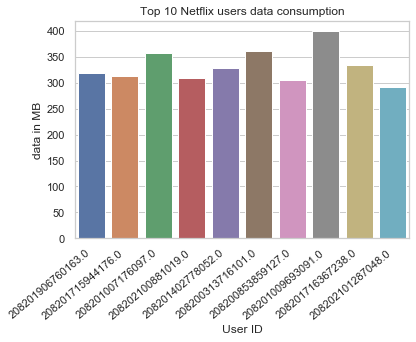

In [510]:
with sns.axes_style("whitegrid"):
    chart = sns.barplot(x=dlabels, y=valu)
    chart.set_xticklabels(rotation=40, ha="right", labels= dlabels)
plt.title("Top 10 Netflix users data consumption")
plt.ylabel('data in MB')
plt.xlabel('User ID')

## Top 3 most used application. 
This is measured by the level of engagement users do with each application. We rank the applications based on how much data users have burnt on it. Total duration and and how frequent a particular application is visited by users would have been great ways to determine the most used application. Since we only have information on the data consumed on a paricular we will go by just that. The session frequency says nothing about wether it was with a particular applicaion or the other so we are unable to use that. There is no also record of the duration of use of an application. We only know the duration of a session.

In [530]:
#This gets the total data spent on an application in MB
def getTotaldata(df, app):
    datatotal = df[app].sum(axis = 0)
    return round(datatotal*10**-6, 2)

In [533]:
dnetflix = getTotaldata(netflixdf, 'Netflix')
dyoutube = getTotaldata(youtubedf, 'YouTube')
dgame =   getTotaldata(gamingdf, 'Gaming')
dsoc =    getTotaldata(socialdf, 'Social Media')
dgoogl =  getTotaldata(googledf, 'Google')
demail =  getTotaldata(emaildf, 'Email')

In [534]:
vals = [dnetflix, dyoutube,dgame, dsoc,dgoogl,demail]

In [537]:
blabels = ['Netflix','YouTube','Gaming','Social Media','Google','Email']

Text(0.5, 0, 'Application')

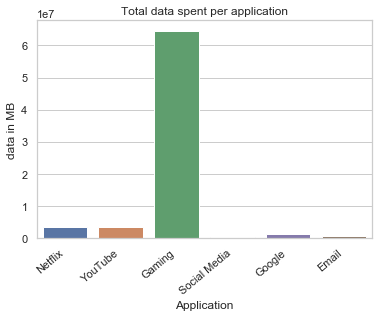

In [538]:
with sns.axes_style("whitegrid"):
    chart = sns.barplot(x=blabels, y=vals)
    chart.set_xticklabels(rotation=40, ha="right", labels= blabels)
plt.title("Total data spent per application")
plt.ylabel('data in MB')
plt.xlabel('Application')

The bar plot shows that users spend most of their data in gaming applications. YouTube and Netflix are the next big areas where 
users spend most of their data on. The plot also indicates that, people 5 times more data on gaming applications than in YouTube and Netflix.
This could gives us two things to think about; either the gaming applications are by nature, data consuming or people actually spend alot more time 
engaging with these applications for different purposes.